<a href="https://colab.research.google.com/github/MeghaUkkali9/Advanced-Machine-Learing/blob/master/Project3_MeghaUkkali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Project`#: 3
Name: Megha Ukkali.
Course: Advanced Machine Learning.
Submission Date: 02/12/2020

# Load the dataset of Cifar-10

The sklearn.datasets module includes utilities to load datasets, including methods to load and fetch popular reference datasets. fetch_openml('name', version=) is used to fetch dataset from openml by name cifar-10.

In [0]:
from sklearn.datasets import fetch_openml

cifar = fetch_openml('CIFAR_10', version=1)


astype() function is used to change the data type of the data of the given numpy array.

In [0]:
import numpy as np
cifar.target = cifar.target.astype(np.float32)

Split dataset into  the training set which takes 60,000 and a test set which takes  the remaining 10,000.



In [0]:
X_train = cifar['data'][:50000]
y_train = cifar['target'][:50000]

X_test = cifar['data'][50000:]
y_test = cifar['target'][50000:]

In [4]:
X_train.shape

(50000, 3072)

In [0]:
y_train[50]

3.0

In [0]:
X_test.shape

(10000, 3072)

# Use PCA to reduce dimensionality

Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [6]:
X_train_reduced.shape

(50000, 217)

In [0]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [8]:
d

217

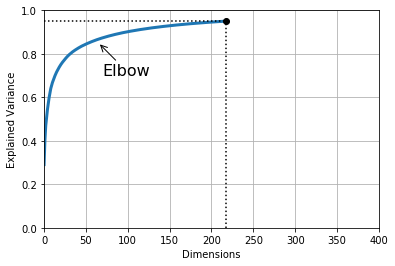

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()


In [12]:
np.sum(pca.explained_variance_ratio_)

0.9502339220373435

# Used Random Forest Classifier Before Applying scaling

Train a new Random Forest classifier on the reduced dataset.

In [0]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

Calculate the time on the reduced dataset. fit() is used to fit the model on the training data

In [0]:
import time
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [0]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 122.41s


**Before Applying scaling**

Next evaluate the classifier on the test set:

In [0]:
Finding accuracy on Test data

In [0]:
from sklearn.metrics import accuracy_score
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.439

In [0]:
 from sklearn.model_selection import cross_val_score
 scores=cross_val_score(rnd_clf2, X_train_reduced, y_train, cv=5, scoring="accuracy")

In [0]:
print("scores:", scores)
print("Mean:",scores.mean())

scores: [0.4373 0.4235 0.4306 0.4268 0.4325]
Mean: 0.43014


The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set.

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(rnd_clf2, X_train_reduced, y_train, cv=5)

In [0]:
y_train_pred

array([3., 5., 6., ..., 9., 7., 5.], dtype=float32)

Check the performance of the model by applying confusion matrix which given Number of true positive, false positive, True negative, False positive.

In [0]:
from sklearn.metrics import confusion_matrix
conf_mx_dr = confusion_matrix(y_train, y_train_pred)
conf_mx_dr


array([[2600,  307,  233,  173,  165,  132,  126,  164,  759,  341],
       [ 204, 2838,   86,  176,   62,  158,  146,  173,  337,  820],
       [ 538,  186, 1462,  374,  851,  364,  561,  293,  191,  180],
       [ 261,  270,  465, 1298,  315,  994,  541,  288,  212,  356],
       [ 311,  155,  712,  308, 1927,  253,  634,  354,  189,  157],
       [ 200,  239,  439,  900,  346, 1667,  429,  363,  210,  207],
       [ 102,  173,  429,  462,  608,  359, 2454,  152,  111,  150],
       [ 206,  298,  320,  396,  501,  443,  266, 1934,  161,  475],
       [ 596,  394,  112,  181,   77,  202,   64,   72, 2945,  357],
       [ 238, 1041,   81,  187,   82,  185,  116,  254,  434, 2382]])

Calculate the sensitivity and specificity using True positive False negative, False positive.

In [0]:
import numpy as np

FP = conf_mx_dr.sum(axis=0) - np.diag(conf_mx_dr)  
FN = conf_mx_dr.sum(axis=1) - np.diag(conf_mx_dr)
TP = np.diag(conf_mx_dr)
TN = conf_mx_dr.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity: ",TPR.mean())

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity: ",TNR.mean())

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: ",PPV.mean())

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value: ",NPV.mean())

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False positive rate: ",FPR.mean())

# False negative rate
FNR = FN/(TP+FN)
print("False negative rate: ",FNR.mean())

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate: ",FDR.mean())

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy: ",ACC.mean())

Sensitivity:  0.43014
Specificity:  0.9366822222222222
Precision:  0.42523948172242604
Negative predictive value:  0.9368023240721419
False positive rate:  0.06331777777777778
False negative rate:  0.5698599999999999
False discovery rate:  0.5747605182775739
Overall accuracy:  0.8860279999999999


Diagonal bright shows less number of errors.

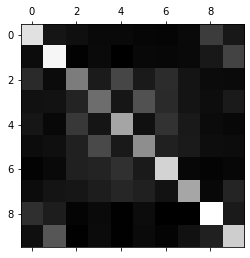

In [0]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx_dr, cmap=plt.cm.gray)
plt.show()

#Random Forest classifier After Applying scaling

Scaling is used to standardize the independent features present in the data in a fixed range.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
scale_scores=cross_val_score(rnd_clf2, X_train_scaled, y_train, cv=5, scoring="accuracy")

In [0]:
print("scores:", scale_scores)
print("Mean:",scale_scores.mean())

scores: [0.4609 0.4525 0.4562 0.4596 0.457 ]
Mean: 0.45724


In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred_sc = cross_val_predict(rnd_clf2, X_train_scaled, y_train, cv=5)


In [0]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred_sc)
conf_mx


array([[2671,  257,  257,  128,  142,  122,  130,  162,  809,  322],
       [ 156, 2621,   83,  191,  142,  152,  189,  181,  323,  962],
       [ 488,  193, 1611,  371,  758,  338,  642,  289,  159,  151],
       [ 238,  230,  394, 1386,  397,  932,  694,  282,  140,  307],
       [ 287,  134,  686,  293, 1966,  246,  682,  390,  140,  176],
       [ 174,  188,  453,  862,  382, 1844,  445,  365,   96,  191],
       [  91,  200,  415,  400,  572,  312, 2692,  122,   50,  146],
       [ 217,  211,  236,  299,  570,  344,  271, 2318,  100,  434],
       [ 491,  448,   87,  159,   90,  191,   62,   86, 2997,  389],
       [ 199,  856,   70,  138,   87,  127,  179,  195,  393, 2756]])

In [0]:
import numpy as np

# conf_mx=np.matrix(conf_mx)

FP = conf_mx.sum(axis=0) - np.diag(conf_mx)  
FN = conf_mx.sum(axis=1) - np.diag(conf_mx)
TP = np.diag(conf_mx)
TN = conf_mx.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity: ", TPR.mean())

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity: ",TNR.mean())

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: ",PPV.mean())

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value: ",NPV.mean())

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False positive rate: ",FPR.mean())

# False negative rate
FNR = FN/(TP+FN)
print("False negative rate: ",FNR.mean())

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate: ",FDR.mean())

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy: ",ACC.mean())

Sensitivity:  0.45724
Specificity:  0.9396933333333333
Precision:  0.4538090016900311
Negative predictive value:  0.9397989506443303
False positive rate:  0.06030666666666666
False negative rate:  0.54276
False discovery rate:  0.5461909983099689
Overall accuracy:  0.8914479999999999


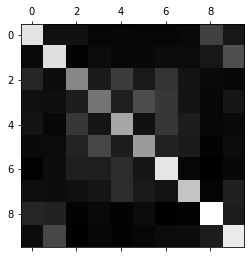

In [0]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm. Before applying PCA on dataset, training took comparatively less time. And performance was better than this. And It also depend on dataset.

#SVM

Applying Super Vector Machine, It gives the accuracy 10% when applied on the test set. 
This classifier did not work for me. It took more than 2 hours to execute. So I did not execute this classifier.

In [0]:

from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train_reduced, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
X_test_reduced_svm = pca.transform(X_test)
y_pred_svm = svm_clf.predict(X_test_reduced_svm)

accuracy_score(y_test, y_pred_svm)

0.1

In [0]:
 from sklearn.model_selection import cross_val_score
 scores_svm=cross_val_score(svm_clf, X_train_reduced, y_train, cv=5, scoring="accuracy")

KeyboardInterrupt: ignored

In [0]:
print("scores:", scores_svm)
print("Mean:",scores_svm.mean())

In [0]:

y_train_pred_svm = cross_val_predict(svm_clf, X_train_reduced, y_train, cv=5)

KeyboardInterrupt: ignored

In [0]:
conf_mx_dr_svm = confusion_matrix(y_train, y_train_pred_svm)
conf_mx_dr_svm

In [0]:
conf_mx_dr_svm=np.matrix(conf_mx_dr_svm)

FP = conf_mx_dr_svm.sum(axis=0) - np.diag(conf_mx_dr_svm)  
FN = conf_mx_dr_svm.sum(axis=1) - np.diag(conf_mx_dr_svm)
TP = np.diag(conf_mx_dr_svm)
TN = conf_mx_dr_svm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity: ",TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity: ",TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: ",PPV)

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value: ",NPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False positive rate: ",FPR)

# False negative rate
FNR = FN/(TP+FN)
print("False negative rate: ",FNR)

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate: ",FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy: ",ACC)

In [0]:
plt.matshow(conf_mx_dr_svm, cmap=plt.cm.gray)
plt.show()

#SVM after applying scalling

In [0]:

X_train_scaled_svm = scaler.fit_transform(X_train.astype(np.float32))
scale_scores_svm=cross_val_score(svm_clf, X_train_scaled_svm, y_train, cv=5, scoring="accuracy")

In [0]:
print("scores:", scale_scores_svm)
print("Mean:",scale_scores_svm.mean())

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred_sc_svm = cross_val_predict(svm_clf, X_train_scaled_svm, y_train, cv=5)

In [0]:
conf_mx_sc_svm = confusion_matrix(y_train, y_train_pred_sc_svm)
conf_mx_sc_svm

In [0]:
conf_mx_sc_svm=np.matrix(conf_mx_sc_svm)

FP = conf_mx_sc_svm.sum(axis=0) - np.diag(conf_mx_sc_svm)  
FN = conf_mx_sc_svm.sum(axis=1) - np.diag(conf_mx_sc_svm)
TP = np.diag(conf_mx_sc_svm)
TN = conf_mx_sc_svm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity: ", TPR.mean())

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity: ", TNR.mean())

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: ", PPV.mean())

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value: ", NPV.mean())

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False positive rate: ", FPR.mean())

# False negative rate
FNR = FN/(TP+FN)
print("False negative rate: ", FNR.mean())

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate: ", FDR.mean())

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy: ", ACC.mean())

In [0]:
plt.matshow(conf_mx_sc_svm, cmap=plt.cm.gray)
plt.show()

# KNeighborsClassifier

KNeighborsClassifier belongs to the supervised learning domain and finds intense application in pattern recognition. It can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things are close to each other.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduced, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
X_test_reduced_knn = pca.transform(X_test)
y_pred_knn = knn_clf.predict(X_test_reduced_knn)

accuracy_score(y_test, y_pred_knn)

0.3625

In [0]:
scores_knn = cross_val_score(knn_clf, X_train_reduced, y_train, cv=5, scoring="accuracy")

In [0]:
print("scores:", scores_knn)
print("Mean:",scores_knn.mean())

scores: [0.3617 0.3512 0.3464 0.3528 0.3526]
Mean: 0.35294000000000003


In [0]:
y_train_pred_knn = cross_val_predict(knn_clf, X_train_reduced, y_train, cv=5)

In [0]:
conf_mx_dr_knn = confusion_matrix(y_train, y_train_pred_knn)
conf_mx_dr_knn

array([[2728,   41,  498,   84,  311,   51,  148,   58, 1047,   34],
       [ 749, 1216,  424,  186,  745,  108,  406,   85,  915,  166],
       [ 562,   22, 2186,  187, 1203,  163,  377,   65,  219,   16],
       [ 418,   62, 1102, 1016,  878,  521,  681,   81,  207,   34],
       [ 424,   15, 1214,  188, 2432,   92,  330,   80,  212,   13],
       [ 334,   39, 1070,  700,  946, 1093,  570,   86,  144,   18],
       [ 188,   32, 1089,  265, 1405,  171, 1732,   21,   88,    9],
       [ 433,   49,  826,  255, 1364,  226,  385, 1190,  214,   58],
       [ 800,   80,  273,  128,  281,   80,   93,   24, 3201,   40],
       [ 807,  382,  479,  217,  545,  102,  350,  150, 1115,  853]])

In [0]:
conf_mx_dr_knn=np.matrix(conf_mx_dr_knn)

FP = conf_mx_dr_knn.sum(axis=0) - np.diag(conf_mx_dr_knn)  
FN = conf_mx_dr_knn.sum(axis=1) - np.diag(conf_mx_dr_knn)
TP = np.diag(conf_mx_dr_knn)
TN = conf_mx_dr_knn.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity: ", TPR.mean())

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity: ", TNR.mean())

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: ", PPV.mean())

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value: ", NPV.mean())

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False positive rate: ", FPR.mean())

# False negative rate
FNR = FN/(TP+FN)
print("False negative rate: ", FNR.mean())

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate: ", FDR.mean())

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy: ", ACC.mean())

Sensitivity:  0.35294
Specificity:  0.9281044444444443
Precision:  0.43177119737896
Negative predictive value:  0.9287892244793382
False positive rate:  0.07189555555555556
False negative rate:  0.6470600000000001
False discovery rate:  0.56822880262104
Overall accuracy:  0.8705879999999999


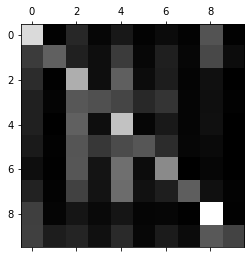

In [0]:
plt.matshow(conf_mx_dr_knn, cmap=plt.cm.gray)
plt.show()

#KNN after applying Scaling

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier than variables that are on a small scale.

It took more time for me to execute. So I did not excute.

In [0]:

X_train_scaled_knn = scaler.fit_transform(X_train.astype(np.float32))
scale_scores_knn = cross_val_score(knn_clf, X_train_scaled_knn, y_train, cv=5, scoring="accuracy")

KeyboardInterrupt: ignored

In [0]:
print("scores:", scale_scores_knn)
print("Mean:",scale_scores_knn.mean())

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred_sc_knn = cross_val_predict(knn_clf, X_train_scaled_knn, y_train, cv=5)

In [0]:
conf_mx_sc_knn = confusion_matrix(y_train, y_train_pred_sc_knn)
conf_mx_sc_knn

In [0]:
conf_mx_dr_knn=np.matrix(conf_mx_dr_knn)

FP = conf_mx_dr_knn.sum(axis=0) - np.diag(conf_mx_dr_knn)  
FN = conf_mx_dr_knn.sum(axis=1) - np.diag(conf_mx_dr_knn)
TP = np.diag(conf_mx_dr_knn)
TN = conf_mx_dr_knn.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity: ",TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity: ",TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: ",PPV)

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value: ",NPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False positive rate: ",FPR)

# False negative rate
FNR = FN/(TP+FN)
print("False negative rate: ",FNR)

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate: ",FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy: ",ACC)

In [0]:
plt.matshow(conf_mx_sc_knn, cmap=plt.cm.gray)
plt.show()

#ROC Curve

In [0]:

y_train_5 = (y_train == 6)

In [0]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5,
                             method="decision_function")

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

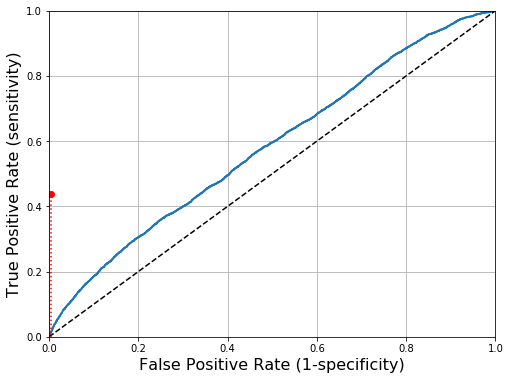

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')                           # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (1-specificity)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (sensitivity)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [0]:
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train_reduced, y_train_5, cv=5,
                                    method="predict_proba")


In [0]:
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

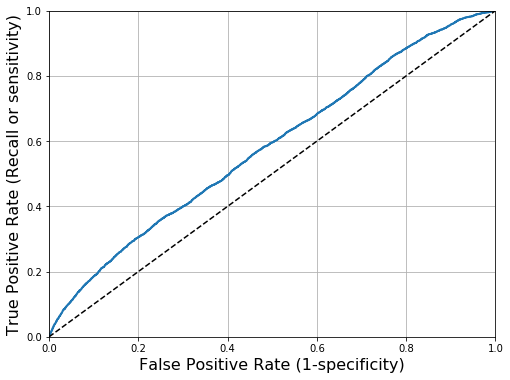

In [0]:
def plot_roc_curve(fpr_forest, tpr_forest, label=None):
    plt.plot(fpr_forest, tpr_forest, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (1-specificity)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall or sensitivity)', fontsize=16)    # Not shown
    plt.grid(True)  
    
plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

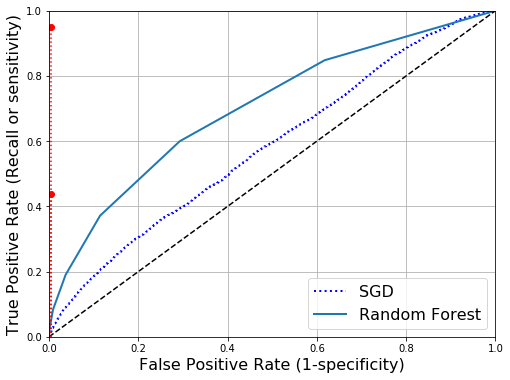

In [0]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [0]:
y_probas_knn = cross_val_predict(knn_clf, X_train_reduced, y_train_5, cv=5)

In [0]:
y_scores_knn =  y_probas_knn[:, 1] 
fprknn, tprknn, thresholdsknn = roc_curve(y_train_5, y_scores_knn)


IndexError: ignored

In [0]:
def plot_roc_curve(fprknn, tprknn, label=None):
    plt.plot(fprknn, tprknn, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate(1-specificity)', fontsize=16)
    plt.ylabel('True Positive Rate(sensitivity)', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fprknn, tprknn)
plt.show()

NameError: ignored

<Figure size 576x432 with 0 Axes>

In [0]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

ValueError: ignored

-----------------------------------------------------------------

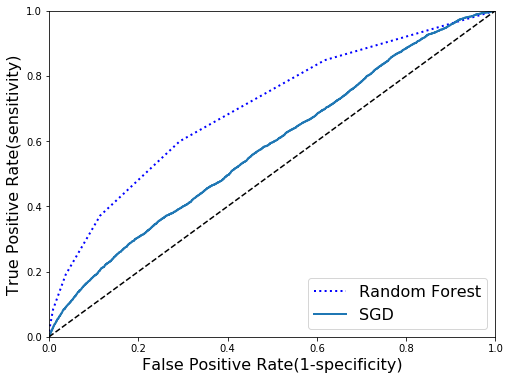

In [0]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, "b:", linewidth=2, label="Random Forest")
plot_roc_curve(fpr, tpr, "SGD")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [0]:
roc_auc_score(y_train_5, y_scores_forest)

0.7011363133333333

In [0]:
from sklearn.metrics import precision_score
y_train_pred_forest = cross_val_predict(forest_clf, X_train_scaled, y_train_5, cv=5)
precision_score(y_train, y_train_pred_forest)

ValueError: ignored

######################################################################

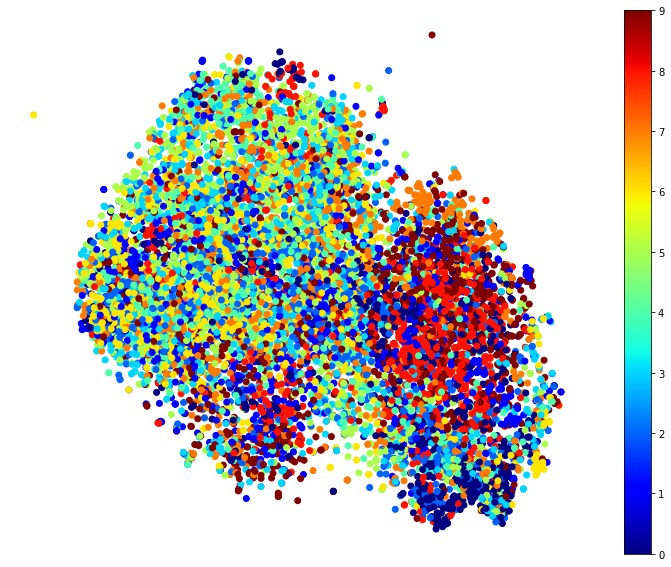

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

This plot tells us which numbers are easily distinguishable from the others (e.g., 8,and 1 are rather well separated clusters), and it also tells us which numbers are often hard to distinguish (e.g., 3s,4s,6s and 9s, and so on).

Let's focus on digits 2 and 3, which seem to overlap a lot. 

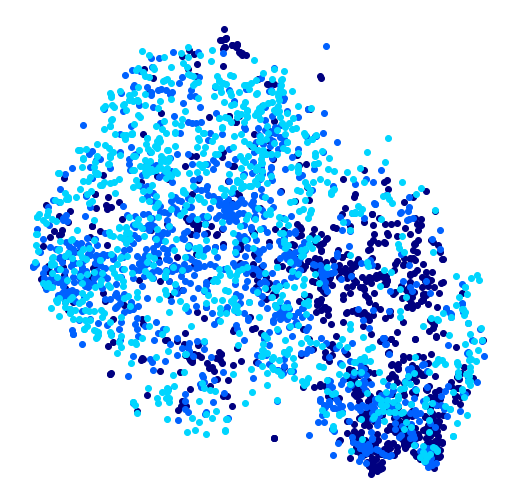

In [0]:
import matplotlib as mpl
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (0, 2 , 3):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Let's see if we can produce a nicer image by running t-SNE on these 3 digits

In [0]:
idx = (y == 0 ) | (y == 2) | (y == 3) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

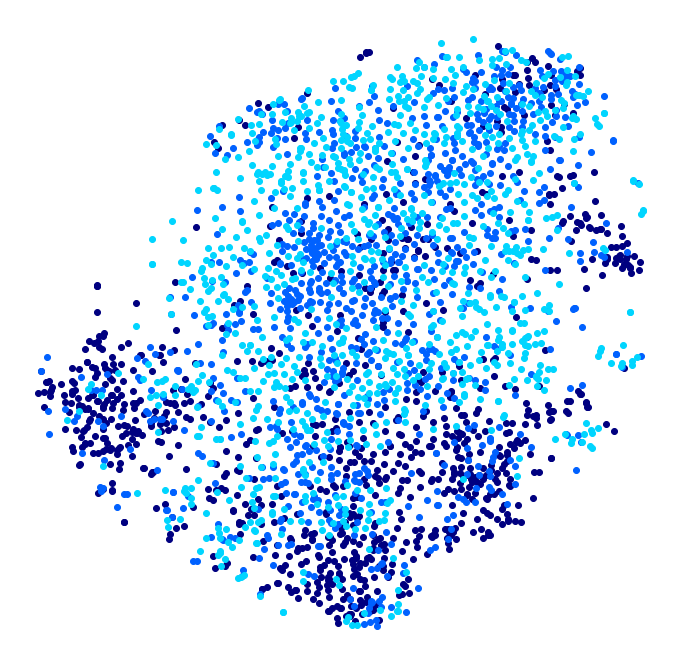

In [0]:
plt.figure(figsize=(12,12))
for digit in (0,2, 3):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Much better, now the clusters have far less overlap. But some 0s are all over the place. Plus, there are two distinct clusters of 2s, and also two distinct clusters of 3s. It would be nice if we could visualize a few digits from each cluster, to understand why this is the case. Let's do that now.


Let's create a plot_digits() function that will draw a scatterplot (similar to the above scatterplots) plus write colored digits, with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead. This implementation was inspired from one of Scikit-Learn's excellent examples (plot_lle_digits, based on a different digit dataset). 

In [0]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

plot_digits()is used to just write colored digits. It uses reduced dataset.

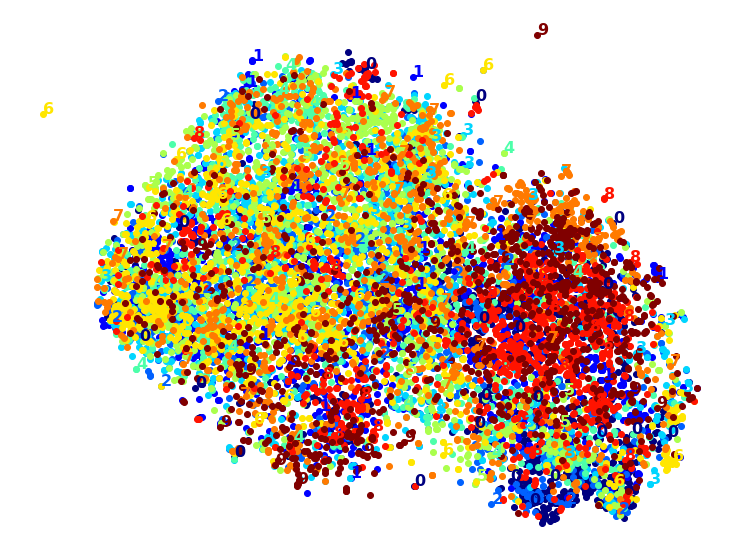

In [0]:
plot_digits(X_reduced, y)

It is not beautiful. Use images by using plot_digits 

The clusters are overlapped too much. The number are not seen properly in the above image.

ValueError: ignored

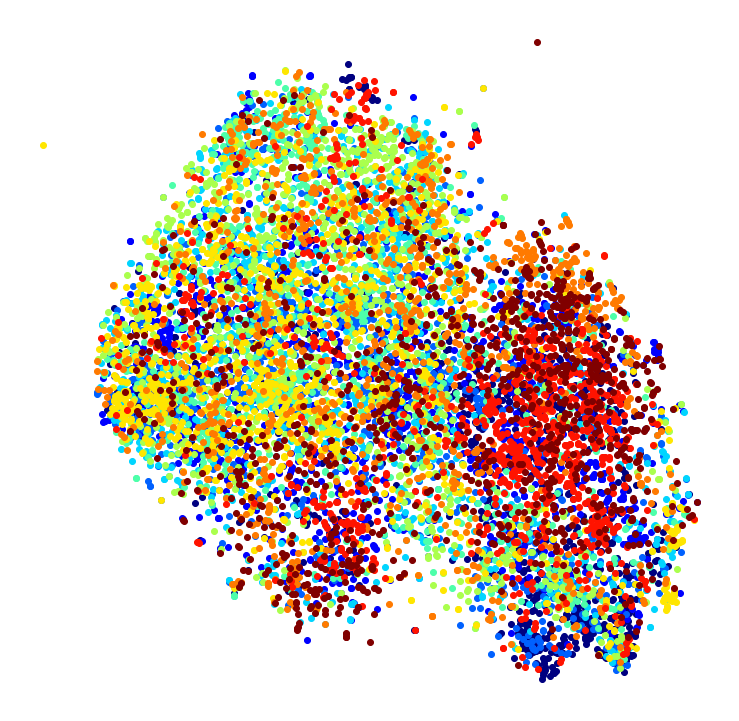

In [0]:
plot_digits(X_reduced, y, images=X, figsize=(13, 13))

In the above image, we can see that clusters are well grouped whereas few of the data are scattered.

 using other dimensionality reduction algorithms such as PCA, LLE and compare the resulting visualizations.

Let's start with PCA. We will also time how long it takes:

PCA took 3.4s.


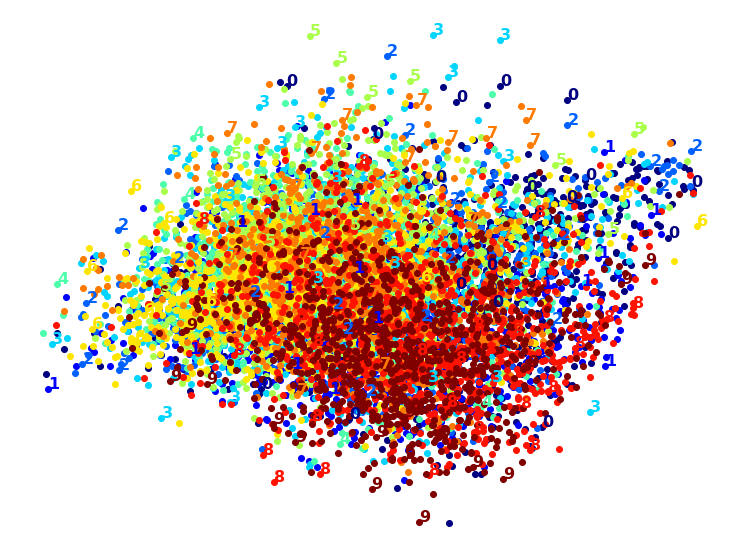

In [0]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

PCA is took very less time i.e. 0.5s . Here No clusters are found. The clusters are too overlapped. This is not good for this dataset.

# LLE

LLE stands for non linear dimensionality reduction. It is manifold learning technique. LLE first look to closest neighbour and then it look for low dimensionsal representation on training set.

LLE took 805.4s.


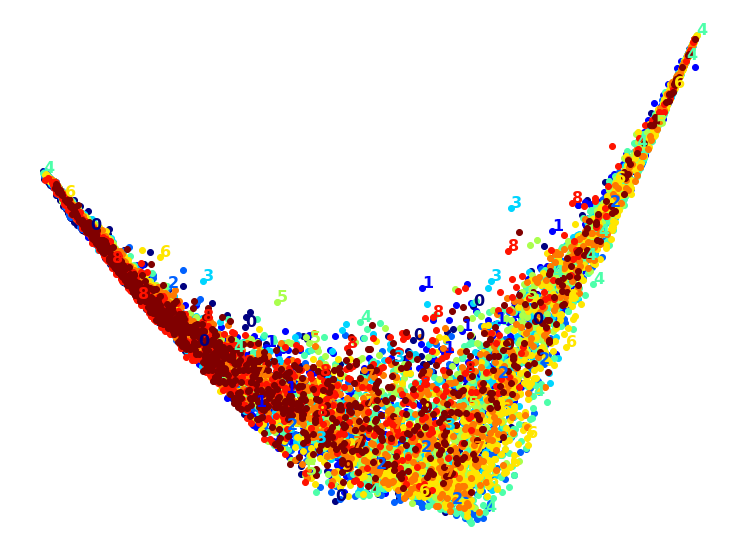

In [0]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

It took more time when compare to PCA. The result does not look too good.

# Report

Cifar_10 dataset is loaded using Openml. Cifar has 60000 instances, out of which 50000 is for training the model and 10000 is for testing.

In this project, k-fold cross validation, classifiers such as SGD, Random Forest, SVM, kNeighbours are used. 

Used PCA to reduce the dimension. Whereas T-SNE was taking to much time to reduce the dimensionality. So I have reduced dimensionality using PCA. After reducing dimensionality, I have applied scaling to standardize the independent feature. 

To compare both (Dimensionality and scaling) I have applied each classifiers on both. As I have observed that after applying scaling there is little increase in accuracy.

I have done SVM, Random Forest, KNeighbors and SGD classifier. Due to longer execution of time I have not completed SVM. For KNeighbors, it works well for reduced dimensions but not worked on scaling. So I didn't execute that.

Random Forest classifier took 122s to fit the model. And the accuracy is 44%, Sensitivity is  0.43014, and Specificity:  0.9366822222222222

For KNeighbours classifier, the accuracy is 36%, Sensitivity:  0.35294
Specificity:  0.9281044444444443. 

Plotted the ROC curve to compare the classifiers, It works well for Random forest and SGD. As I have observed that Random forest classifier is best than any classifier on this dataset. It took average time to compute and performed good. 

KNN has multiple classes, so ROC is didn't work on that because ROC is binary classifier.

I found SVM was taking too much time to compute it around more than 2 and hour. 

Used scatter plot to see how the dataset is scattered. This dataset does not have clusters and scattered too much. Used LLE to reduce the dimension but it is not good. So applied PCA to reduce the dimensions.

So Random Forest is good fit for Cifar-10 dataset.